In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [2]:
# Générer un dataset fictif
np.random.seed(42)
n = 5000  # Nombre d'utilisateurs test

# Simuler les données utilisateur
data = pd.DataFrame({
    "id_utilisateur": np.arange(n),
    "frequence_connexion": np.random.randint(1, 30, size=n),  # Nb jours entre connexions
    "temps_moyen_session": np.random.uniform(1, 30, size=n),  # Minutes
    "annonces_publiées": np.random.randint(0, 20, size=n),
    "messages_envoyés": np.random.randint(0, 50, size=n),
    "favoris_ajoutés": np.random.randint(0, 15, size=n),
    "dernière_connexion": np.random.randint(0, 100, size=n),  # Nb jours depuis la dernière co
    "avis_satisfaction": np.random.uniform(1, 5, size=n),  # Note sur 5
    "support_contacté": np.random.randint(0, 5, size=n),  # Nombre de contacts support
    "churn": np.random.choice([0, 1], size=n, p=[0.7, 0.3])  # 0 = reste, 1 = churn
})

# Vérifier les premières lignes
print(data.head())


   id_utilisateur  frequence_connexion  temps_moyen_session  \
0               0                    7            28.474462   
1               1                   20            10.782864   
2               2                   29            22.024454   
3               3                   15            16.625577   
4               4                   11             2.758239   

   annonces_publiées  messages_envoyés  favoris_ajoutés  dernière_connexion  \
0                  5                14                4                  13   
1                  0                41               12                  37   
2                  9                45                5                  37   
3                 13                33                8                   3   
4                 17                47               14                  61   

   avis_satisfaction  support_contacté  churn  
0           1.917346                 2      1  
1           2.720603                 3      0  
2 

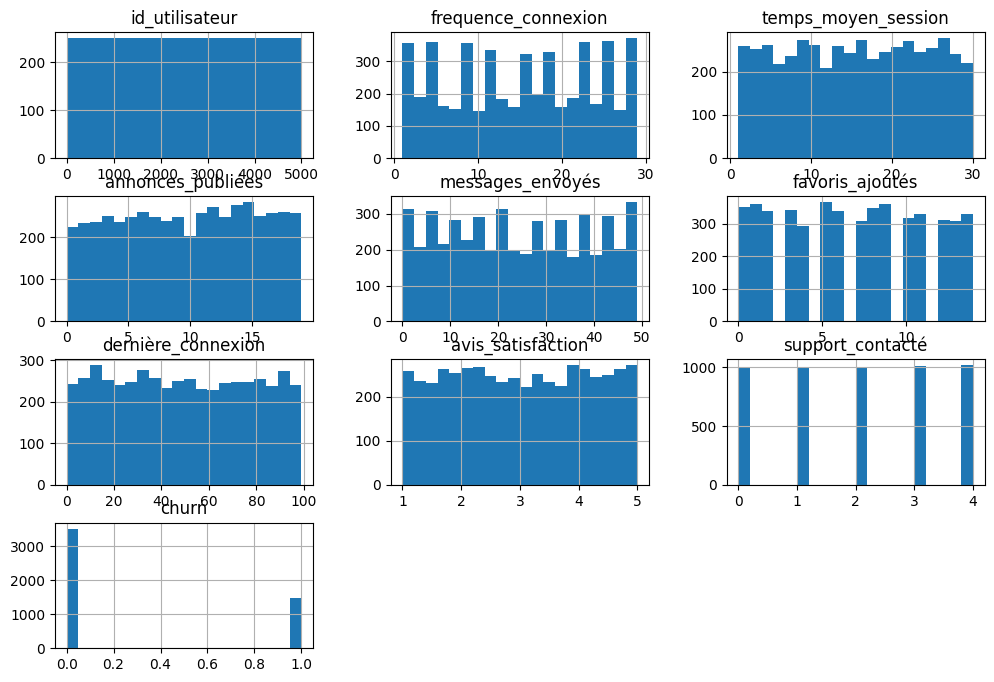

In [3]:
data.hist(figsize=(12,8), bins=20)
plt.show() 

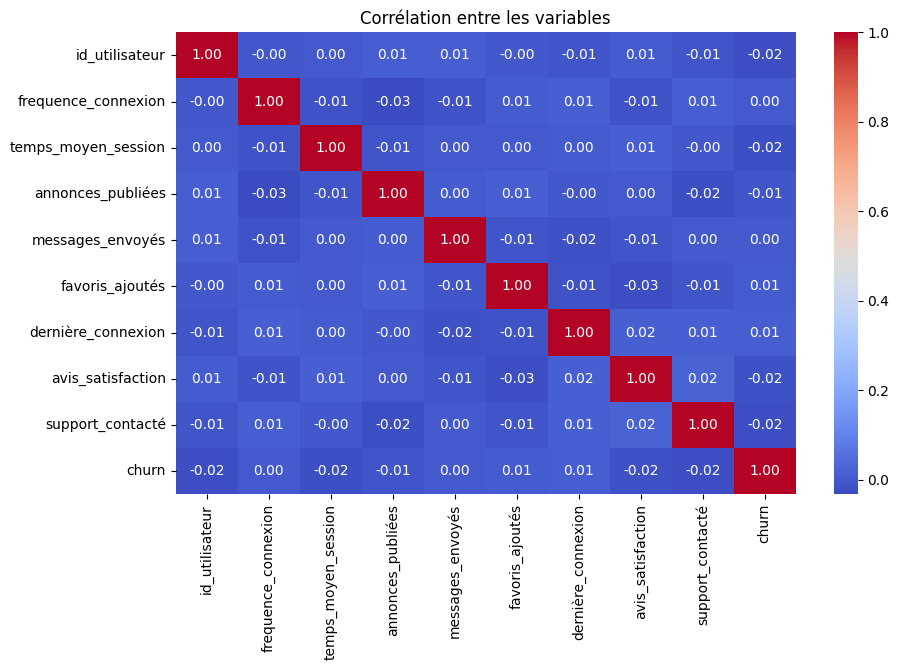

In [4]:
# Matrice de corrélation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre les variables")
plt.show()


In [5]:
# Séparation des variables explicatives et de la cible
X = data.drop(columns=["id_utilisateur", "churn"])  # Supprimer ID utilisateur et la cible
y = data["churn"]

# Séparation en jeu d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Initialiser et entraîner le modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédictions sur l’ensemble test
y_pred = model.predict(X_test)


In [7]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
  
# Rapport de classification
print("Rapport de classification :\n", classification_report(y_test, y_pred))


Accuracy: 0.71
Rapport de classification :
               precision    recall  f1-score   support

           0       0.72      0.98      0.83       722
           1       0.24      0.02      0.03       278

    accuracy                           0.71      1000
   macro avg       0.48      0.50      0.43      1000
weighted avg       0.59      0.71      0.61      1000



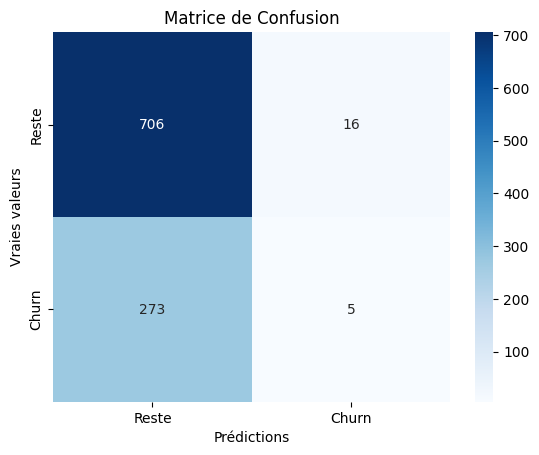

In [ ]:
# Matrice de confusion test
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Reste", "Churn"], yticklabels=["Reste", "Churn"])
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de Confusion")
plt.show()


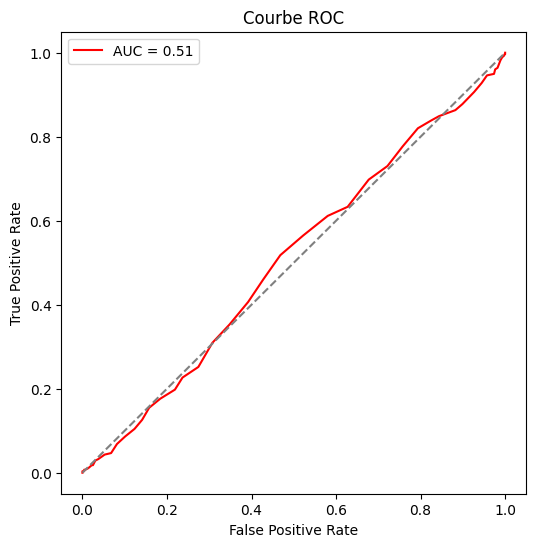

In [10]:
# Courbe ROC
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color="red")
plt.plot([0,1], [0,1], linestyle='--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC")
plt.legend()
plt.show()
